### Clustering の種類
### 非階層型 Clustering
- Data 列数の目安: 数百個
- 長所: 次元が多い場合も機能する
- 短所: 事前に Cluster 数を指定する必要がある（※不要な Algorithm もある）

### 階層型 Clustering
- Data 数列の目安: 数十個
- 長所: 事前に Cluster 数を与える必要なし分類過程を視覚的に確認できる
- 短所: 計算量が多いため、次元が多いと機能しない。機能しても解釈が難しい。

### Knock 1: k-means で非階層型 Clustering を実施してみよう

#### k-means 法（k 平均法）
- 各 Data 間での距離をもとに Group 分けをしていく方法。
- 適当な Cluster に分けた後、Cluster の平均を用いてうまく Data が分かれるように調整していく。
- 任意の k 個の Cluster を作成する Algorithm ということが名前の由来。

In [1]:
# Iris data の読み込み
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()

In [2]:
# Iris data の形状
iris.data.shape

(150, 4)

In [3]:
# Iris data の花の種類
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [4]:
# DataFrame に格納
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
# Data の全体像
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


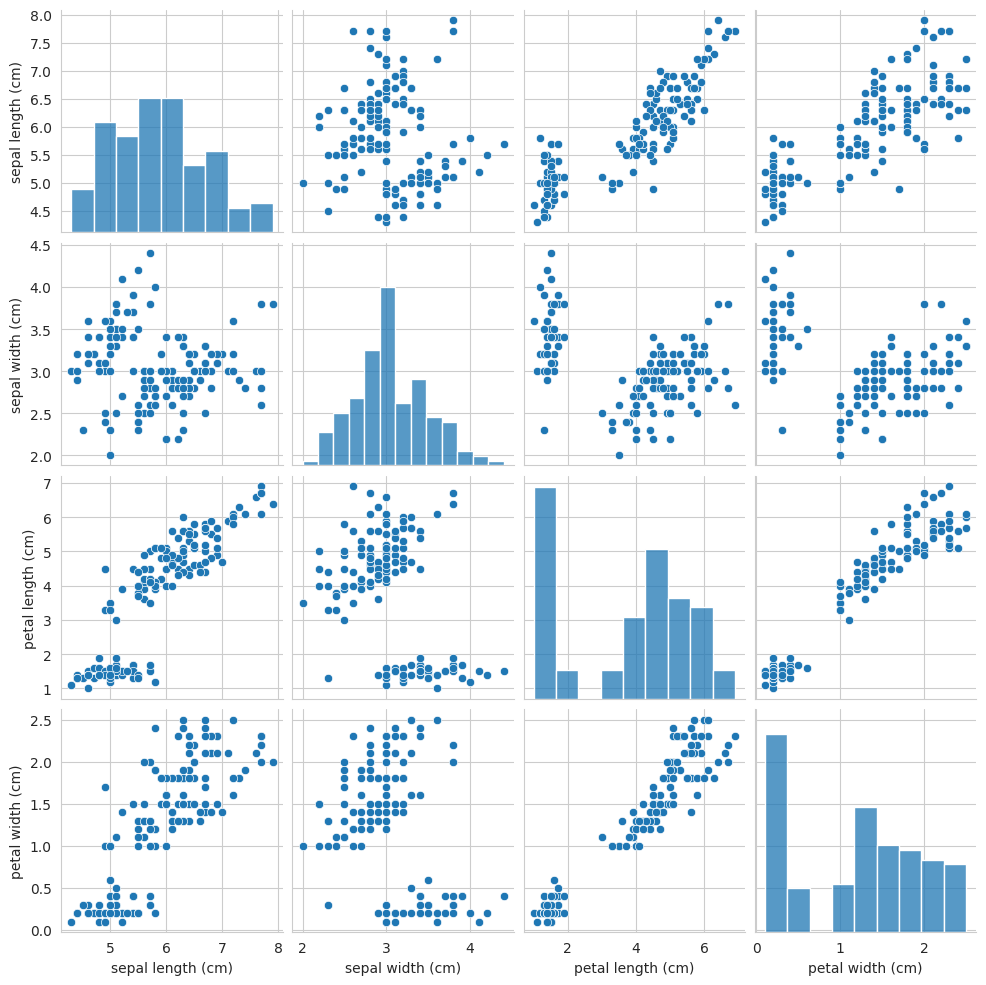

In [6]:
# 変数の散布図
import seaborn as sns
df_temp = df_iris.copy()
sns.pairplot(df_temp)  # Pair-plot で各変数の Pair ごとに散布図を表示

Data 分析や機械学習は前処理が８割と言われる。Data を準備して理解することは重要。

Cluster 数の考え方の Pattern
- 評価を実施して決定
- 実際の運用を想定して決定

In [7]:
# k-means の実行
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=0, init='random')
# 引数 ･･･ n_clusters: Cluster 数, random_state: 乱数 seed, init: Cluster-center(Centroid) の初期化方法
cls_data = df_iris.copy()
model.fit(cls_data)

KMeans(init='random', n_clusters=3, random_state=0)

In [8]:
# Cluster の予測結果取得
cluster = model.predict(cls_data)
print(cluster)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


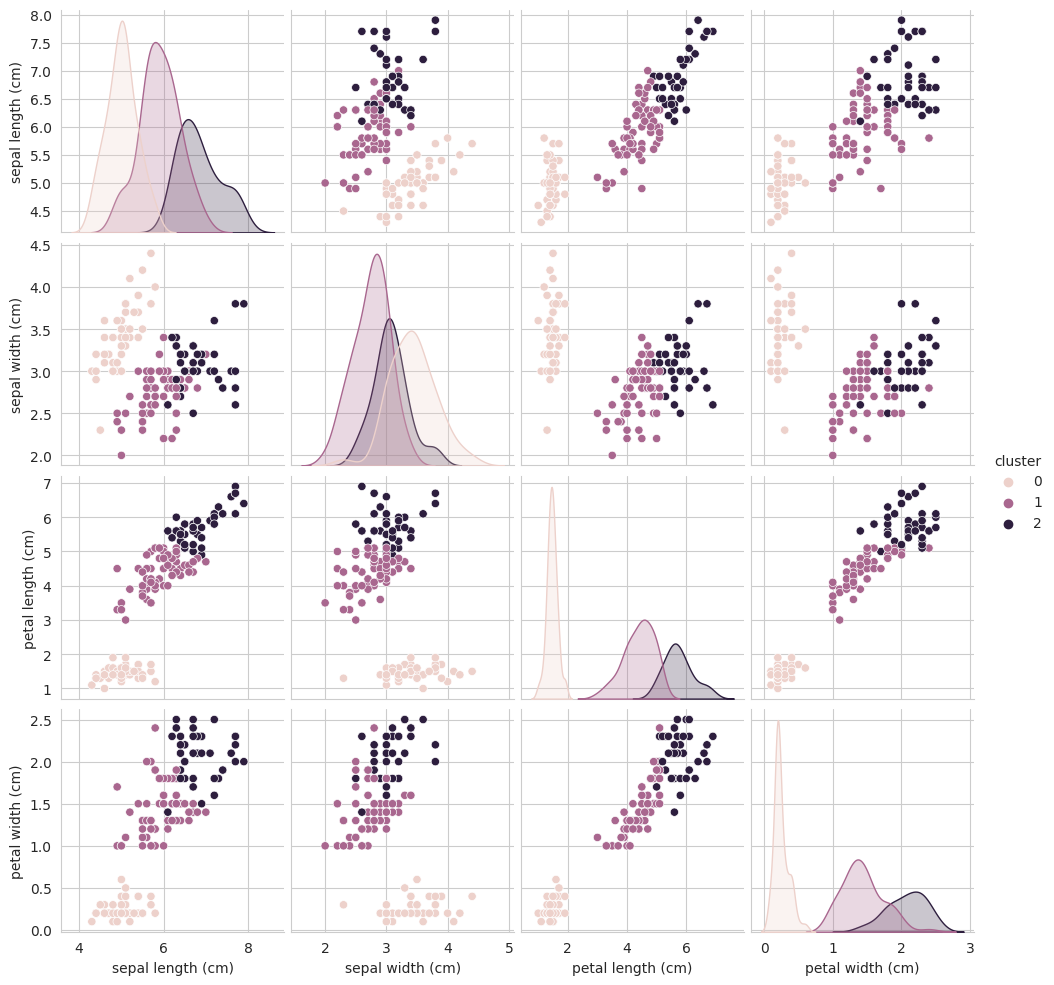

In [9]:
# Cluster の予測結果を可視化
cls_data['cluster'] = cluster
sns.pairplot(cls_data, hue='cluster')

In [10]:
# Cluster-cneter
from IPython.display import display

cluster_center = pd.DataFrame(model.cluster_centers_)
cluster_center.columns = cls_data.columns[:4]
display(cluster_center)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.006000,3.428000,1.462000,0.246000
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053


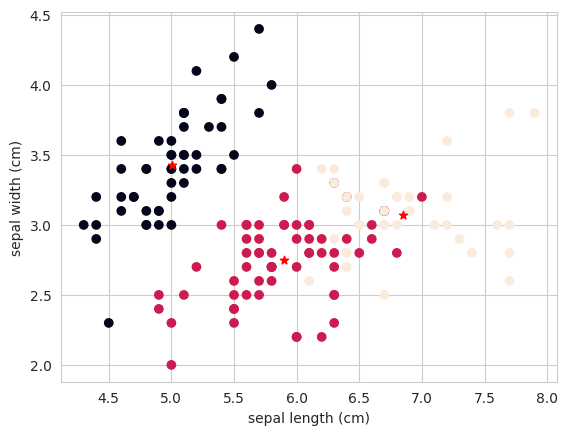

In [11]:
# Cluster-center の可視化
plt.scatter(cls_data['sepal length (cm)'], cls_data['sepal width (cm)'], c=cls_data['cluster'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(cluster_center['sepal length (cm)'], cluster_center['sepal width (cm)'], marker='*', color='red')

In [12]:
# Cluster 番号で集計した説明変数の平均値
display(cls_data.groupby('cluster').mean().round(2))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
cluster,,,,
0,5.01,3.43,1.46,0.25
1,5.90,2.75,4.39,1.43
2,6.85,3.07,5.74,2.07


In [13]:
# 正解 Data
cls_data['target'] = iris.target
cls_data.loc[cls_data['target'] == 0, 'target'] = 'setosa'
cls_data.loc[cls_data['target'] == 1, 'target'] = 'versicolor'
cls_data.loc[cls_data['target'] == 2, 'target'] = 'virginica'
display(cls_data.groupby('target').mean().round(2))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
target,,,,,
setosa,5.01,3.43,1.46,0.25,0.00
versicolor,5.94,2.77,4.26,1.33,1.04
virginica,6.59,2.97,5.55,2.03,1.72


### Knock2: Clustering の結果を評価してみよう

Clustering の結果を、正解 Data と比較して評価するための代表的な２つの指標
- **調整 Rand 指数**（Adjusted Rand Index: ARI)
- **正解率**（Accuracy）

いずれも定量的な指標で
- 1: 最良
- 0: 関係ない Clustering
を返す。

In [14]:
# ARI と Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score

ari = f"ARI: {adjusted_rand_score(iris.target, cls_data['cluster']):.2f}"
accuracy = f"Accuracy: {accuracy_score(iris.target, cls_data['cluster']):.2f}"
print(ari)
print(accuracy)

ARI: 0.73
Accuracy: 0.89


- ARI: 同じ Cluster に属すべき Data 同士が正しく同じ Cluster に属しているかの指標
- Accuracy: Clustering 結果である Cluster-label と正解 Data との完全一致を表す数値
  ※ Label と Cluster 番号が一致していないと正しく評価できない。

### Knock3: k-means++ で非階層 Clustering を実施してみよう

#### k-means++
仮に複数の Cluster-center が近い位置から Start すると効率的に Clustering できないため、初期の Cluster-center を互いに離れた位置に配置し従来の k-means 法よりも効果的で一貫性のある結果を得るようにする。

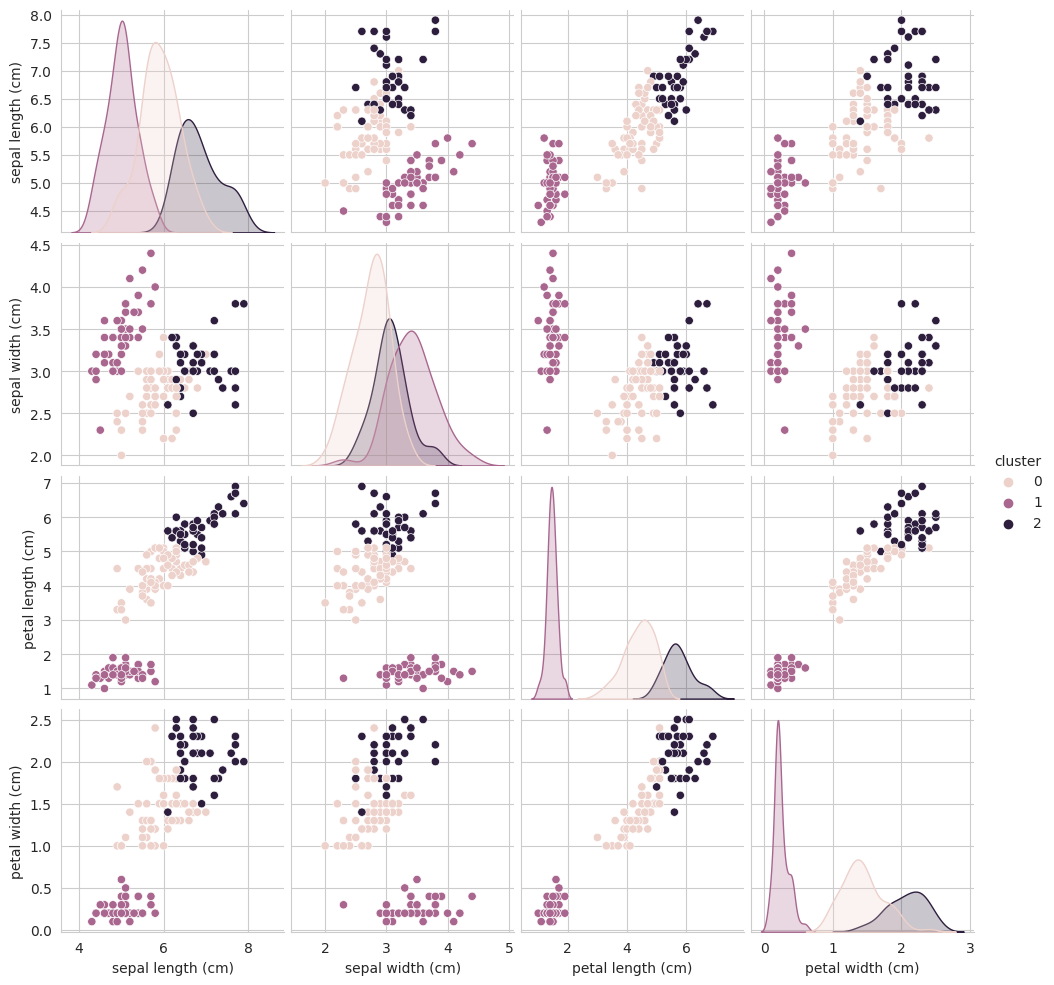

In [15]:
# Clustering 結果を取得（k-means++）
model = KMeans(n_clusters=3, random_state=0, init='k-means++')  # init='k-means++' とすることで設定
cls_data = df_iris.copy()
model.fit(cls_data)
cluster = model.predict(cls_data)
cls_data['cluster'] = cluster
sns.pairplot(cls_data, hue='cluster')

In [16]:
# ARI の確認
ari = f"ARI: {adjusted_rand_score(iris.target, cls_data['cluster']):.2f}"
print(ari)

ARI: 0.73


- Parameter を調整しながら定量的な評価を繰り返すことが精度向上の手順になる。
- k-means++ は Random よりも収束が早い為、よほどのことがない限りは k-means++ を利用するのが良い。
※ scikit-lean では、`init=` を指定しなければ Default で k-means++ になる。

ARI: 0.54


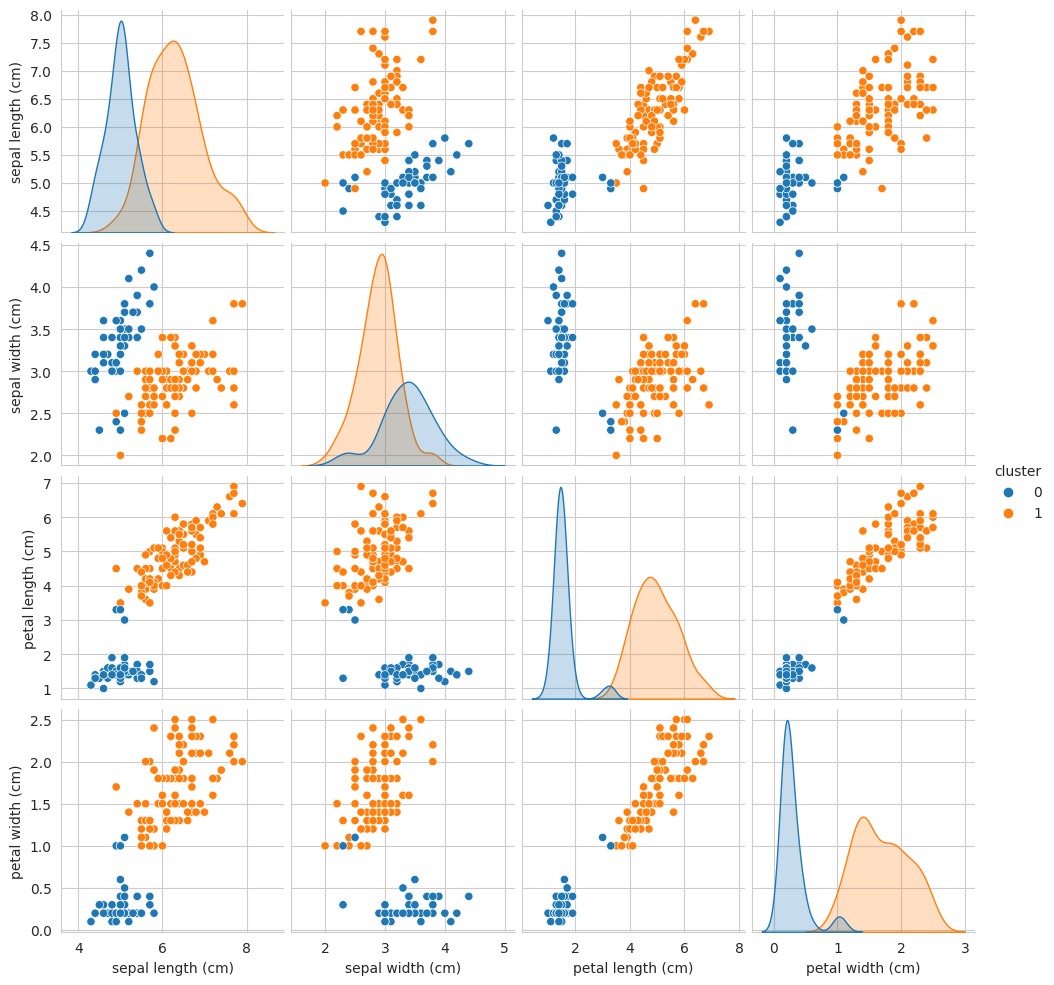

In [17]:
# Cluster 数を２に指定した場合の結果
model = KMeans(n_clusters=2, random_state=0)
cls_data = df_iris.copy()
cls_data['cluster'] = model.fit_predict(cls_data)
sns.pairplot(cls_data, hue='cluster')
print(f"ARI: {adjusted_rand_score(iris.target, cls_data['cluster']):.2f}")

実際には、Clustering を評価する際には正解 Data がないことが多い。
※仮に正解 Data があった場合、Class 分類器のような教師あり学習の方が優れている

### Knock4: Elbow 法で最適な Cluster 数を探索してみよう
- k-means 法の Cluster 数について、分析者の決め打ちになってしまうと説明を行なう時に明確な回答ができない。
- Elbow 法などで最適な Cluster 数を探索していくことで根拠を持たせたい。
- Clustering の性能を数値化するには、Cluster 内の残差平方和（SSE: Sum of Squared errors of prediction）のような指標を用いて、k-means clustering の性能を非悪する必要がある。

### Elbow 法
Cluster 数を変えながら SSE を計算し、結果を図示することで適切な Cluster 数を推定する手法。

<function matplotlib.pyplot.show(*args, **kw)>

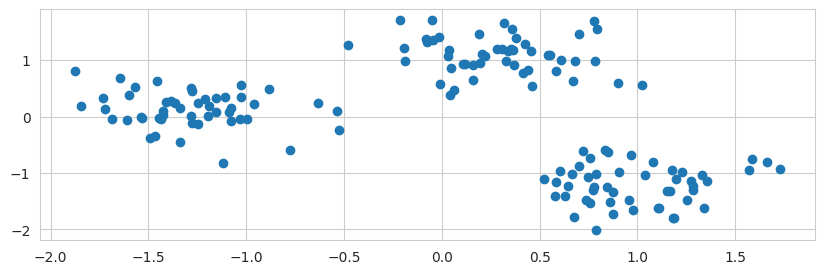

In [18]:
# Sample data の可視化
from sklearn.datasets import make_blobs
from sklearn import cluster, preprocessing

# Sample data を作成
X, y = make_blobs(n_samples=150,    # Sample 点の総数
                  n_features=2,     # 説明変数（次元数）の指定
                  centers=3,        # Cluster の個数
                  cluster_std=0.5,  # Cluster 内の標準偏差
                  shuffle=True,     # Sample を Shuffle
                  random_state=0)   # 乱数生成器の状態を指定
sc = preprocessing.StandardScaler()
X_norm = sc.fit_transform(X)  # Data を標準化
x = X_norm[:, 0]
y = X_norm[:, 1]
plt.figure(figsize=(10, 3))
plt.scatter(x, y)
plt.show

機械学習では値の Scale が違う可能性がある場合、標準化して Scale を合わせる必要がある

In [19]:
# SSE の取得
distortions = []
# k-means にて 1 ~ 10 Cluster まで loop し inertia_属性を distortions に格納
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    # k-means は、inertia_属性を通じて SSE に access できる

- Cluster 内 SSE のことを **Cluster inertia** とも呼ぶ。
- Cluster 内 SSE 値が小さいほど「歪みの内（Clustering がうまくいっている）良い Model」と言える。

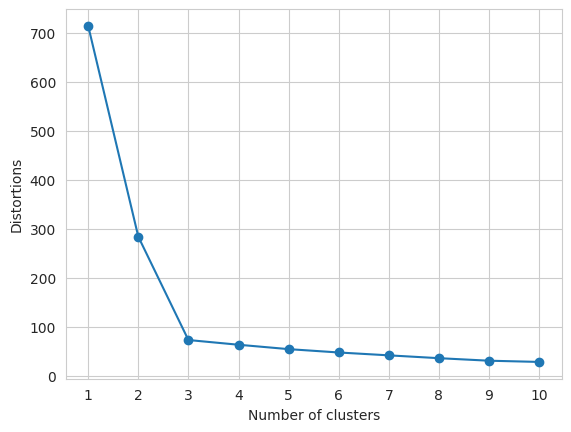

In [20]:
# Elbow 図
plt.plot(range(1, 11), distortions, marker='o')
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.show()

- 「ヒジが折れ曲がっているようにみえる」ところから Elbow と名付けられた。
- Elbow 法では、急激に変化している点を最適な Cluster 数として選ぶ。

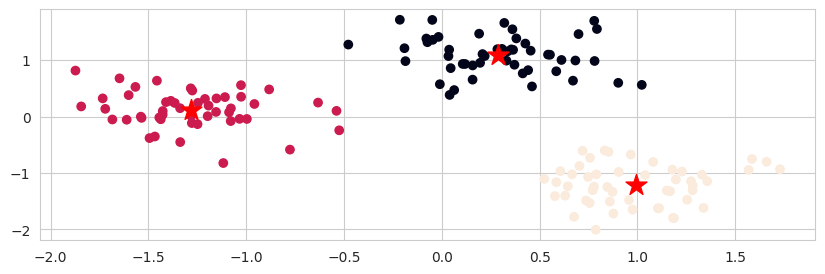

In [21]:
# 最適な Cluster 数での Clustering
km = KMeans(n_clusters=3,
            n_init=10,
            max_iter=300,
            random_state=0)
z_km = km.fit(X_norm)
plt.figure(figsize=(10, 3))
plt.scatter(x, y, c=z_km.labels_)
plt.scatter(z_km.cluster_centers_[:, 0], z_km.cluster_centers_[:, 1], s=250, marker='*', c='red')
plt.show()

#### Elbow 法の弱点
かなり明確に分かれた Data でない限り、Elbow 図はなだらかな曲線を描くため万能ではない。